In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('seaborn-dark')

### Read in emissions/disclosure data provided by CDP

In [70]:
ls ../data

2013_-_Global_500_Emissions_and_Response_Status.csv
ghgp_data_by_year_8_5_17.xlsx*
tickers.csv
tickers.xlsx*


In [71]:
emissions = pd.read_csv('../data/2013_-_Global_500_Emissions_and_Response_Status.csv')

In [72]:
emissions.head()

,Company Name,Account Number,Country,Reporting Year,Ticker Symbol,ISIN,Disclosure Score,Performance Band,Parent Account,Permission,Response Status,Scope 1 (metric tonnes CO2e),Scope 2 (metric tonnes CO2e),Country Location
0,3M Company,285,USA,2013,MMM US,US88579Y1010,70.0,D,NaN,Public,AQ*,4540000.0,2230000.0,"(37.09024, -95.712891)"
1,ABB,282,Switzerland,2013,ABBN VX,CH0012221716,82.0,B,NaN,Public,AQ*,819000.0,857000.0,"(46.818188, 8.227512)"
2,Abbott Laboratories,64,USA,2013,ABT US,US0028241000,84.0,B,NaN,Public,AQ*,470781.0,537821.0,"(37.09024, -95.712891)"
3,Accenture,21318,Ireland,2013,ACN US,IE00B4BNMY34,92.0,B,NaN,Public,AQ*,9383.0,224615.0,"(53.41291, -8.24389)"
4,Ace Ltd.,21320,Switzerland,2013,ACE US,CH0044328745,93.0,A,NaN,Public,AQ*,12912.0,39791.0,"(46.818188, 8.227512)"


Rename some of the columns, and only extract the columns that we want:

In [73]:
emissions['Scope 1'] = emissions['Scope 1 (metric tonnes CO2e)']
emissions['Scope 2'] = emissions['Scope 2 (metric tonnes CO2e)']
emissions['Company'] = emissions['Company Name ']
emissions['Country'] = emissions['Country ']
emissions['Ticker Symbol'] = emissions['Ticker Symbol ']


emissions = emissions[['Company', 'Country', 'Disclosure Score', 'Performance Band',
                       'Scope 1', 'Scope 2', 'Ticker Symbol']]

In [74]:
emissions.head()

,Company,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol
0,3M Company,USA,70.0,D,4540000.0,2230000.0,MMM US
1,ABB,Switzerland,82.0,B,819000.0,857000.0,ABBN VX
2,Abbott Laboratories,USA,84.0,B,470781.0,537821.0,ABT US
3,Accenture,Ireland,92.0,B,9383.0,224615.0,ACN US
4,Ace Ltd.,Switzerland,93.0,A,12912.0,39791.0,ACE US


In [92]:
emissions['Performance Band'].unique()

array(['D', 'B', 'A', nan, 'A-', 'C', 'E'], dtype=object)

In [75]:
emissions.describe()

,Disclosure Score,Scope 1,Scope 2
count,391.000000,3.390000e+02,3.390000e+02
mean,81.427110,8.603685e+06,1.504191e+06
std,18.053032,2.598386e+07,2.718645e+06
min,2.000000,4.147000e+01,1.220000e+02
25%,74.000000,3.832100e+04,1.669390e+05
50%,86.000000,3.362580e+05,4.431650e+05
75%,94.000000,2.763000e+06,1.514495e+06
max,100.000000,1.816900e+08,2.000000e+07


Let's only look at the US

In [76]:
us_emissions = emissions[emissions['Country'] == 'USA']
us_emissions = us_emissions[us_emissions['Disclosure Score'].notnull()]

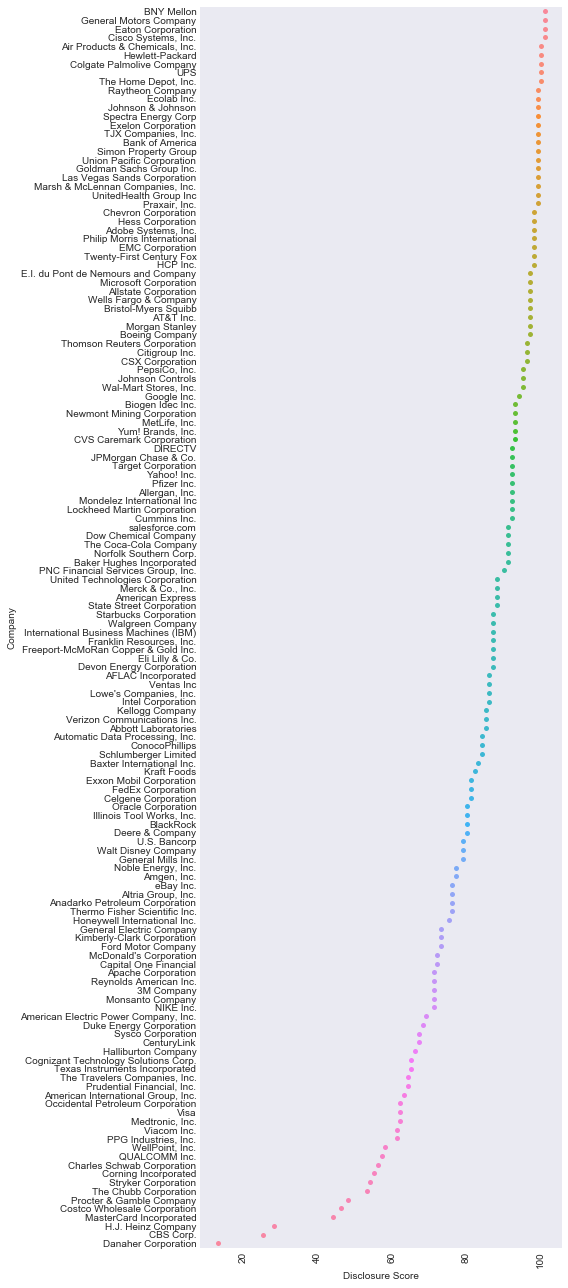

In [78]:
f, ax = plt.subplots(figsize=(8,18))
sns.stripplot(y="Company", x="Disclosure Score",
              data=us_emissions.sort_values(by='Disclosure Score',ascending=False), ax=ax)
f.autofmt_xdate(rotation=90);
plt.tight_layout()

Let's load in stock data to find out the sector for each of these companies. From there, we can group by industries to give a fair comparison:

In [79]:
!ls ../data

2013_-_Global_500_Emissions_and_Response_Status.csv
ghgp_data_by_year_8_5_17.xlsx
tickers.csv
tickers.xlsx


In [80]:
tickers = pd.read_csv('../data/tickers.csv', encoding = "ISO-8859-1")

In [81]:
tickers.head()

,Ticker,Name,Exchange,Category Name,Country
0,OEDV,"Osage Exploration and Development, Inc.",PNK,NaN,USA
1,AAPL,Apple Inc.,NMS,Electronic Equipment,USA
2,BAC,Bank of America Corporation,NYQ,Money Center Banks,USA
3,AMZN,"Amazon.com, Inc.",NMS,Catalog & Mail Order Houses,USA
4,T,AT&T Inc.,NYQ,Telecom Services - Domestic,USA


Let's compare these ticker names to what we see in the emissions file:

In [82]:
emissions.head()

,Company,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol
0,3M Company,USA,70.0,D,4540000.0,2230000.0,MMM US
1,ABB,Switzerland,82.0,B,819000.0,857000.0,ABBN VX
2,Abbott Laboratories,USA,84.0,B,470781.0,537821.0,ABT US
3,Accenture,Ireland,92.0,B,9383.0,224615.0,ACN US
4,Ace Ltd.,Switzerland,93.0,A,12912.0,39791.0,ACE US


In [34]:
tickers[tickers['Ticker'] == 'MMM']

,Ticker,Name,Exchange,Category Name,Country
3837,MMM,3M Company,NYQ,Diversified Machinery,USA


In [83]:
tickers = tickers.rename(index=str, columns={'Name' : 'Company'})

In [88]:
tickers['Company'] = tickers['Company'].apply(lambda x: str(x).lower())
us_emissions['Company'] = us_emissions['Company'].apply(lambda x: str(x).lower())

In [90]:
tickers['Company'].head()

0    osage exploration and development, inc.
1                                 apple inc.
2                bank of america corporation
3                           amazon.com, inc.
4                                  at&t inc.
Name: Company, dtype: object

In [91]:
us_emissions['Company'].head()

0                         3m company
2                abbott laboratories
6                adobe systems, inc.
8                 aflac incorporated
11    air products & chemicals, inc.
Name: Company, dtype: object